In [ ]:
import pandas as pd
import numpy as np
##df=pd.read_csv(r"dir of csv") #while this file shows the output for Alviina Alamesta, it should also 
#work for Larroutourou, but I did see that the LabelStudio tags were slightly different between the two
df.head()
#Our columns
Sentiment=df["sentiment"]
UserId=df["user_id"]
Language=df["language"]
#Our counters
Degitimization_Foreign=0
Appropriation_Decolonialize=0
Whataboutism=0
UlteriorMotives=0
QuestioningSpeakerFollow=0
Misogyny=0
Delegitimisation_Expert=0
Favour=0
Unknown=0
#Ended up forgetting to use these actually, but could be good to show the proportion if that's of any interest.
EnglishCounter=0
HindiCounter=0

In [ ]:
SentimentValue=0 #Counter of sentiment
SentimentList=[] #A new column for every nth tweet
for i in Sentiment: #Separation into individual tweet types
    if "Delegitimization of foreign speakers" in i:
        Degitimization_Foreign+=1
    elif "Appropriation of “decolonialize” narrative" in i:
        Appropriation_Decolonialize+=1
    elif "Whataboutism" in i:
        Whataboutism+=1
    elif "Alleged “ulterior motives” of the speaker" in i:
        UlteriorMotives+=1
    elif "Questioning stature of the speaker (not widely followed)" in i:
        QuestioningSpeakerFollow+=1
    elif "Misogynistic/slut-shaming" in i:
        Misogyny+=1
    elif "Unrecoganisable" in i:
        Unknown+=1
    elif "Delegitimization as speaker may not be considered an  “expert”" in i:
        Delegitimisation_Expert+=1
    elif "Favour" in i:
        Favour+=1
for i in Sentiment:
    if "Unrecoganisable" in i:
        SentimentList.append(0) #no sentiment value here to be added
    elif "Favour" in i:
        SentimentValue+=1 
        SentimentList.append(1)
    else:
        SentimentValue-=1 #thus a total for sentiment value without double or triple counting (in theory at least)
        SentimentList.append(-1)
        
    

In [ ]:
FinalList=[Degitimization_Foreign,Appropriation_Decolonialize,Whataboutism,
          UlteriorMotives,QuestioningSpeakerFollow,Misogyny,Delegitimisation_Expert,Favour,Unknown] #combine previous counters into one list
print(FinalList)

In [149]:
#print(SentimentList)
Language_And_Sentiment=[]
EnglishSentiment=[]
HindiSentiment=[]
OtherSentiment=[]
for i, j in zip(SentimentList,Language): #with our new sentiment list, we can compare across languages
    Language_And_Sentiment.append([i,j])
for i in Language_And_Sentiment:
    if 'en' in i:
        EnglishSentiment.append(i[0])
    elif 'in' in i:
        HindiSentiment.append(i[0])
    else:
        OtherSentiment.append(i[0])
print(np.average(EnglishSentiment),"Average English reply sentiment out of",len(EnglishSentiment),"replies")
print(np.average(HindiSentiment),"Average Hindi reply sentiment out of",len(HindiSentiment),"replies")
print(np.average(OtherSentiment),"Average other-language reply sentiment out of",len(OtherSentiment),"replies")

-0.75 Average English reply sentiment out of 96 replies
-1.0 Average Hindi reply sentiment out of 1 replies
-0.0625 Average other-language reply sentiment out of 16 replies


In [150]:
TotalResponses=len(Sentiment)-Unknown
#print(SentimentValue)
NetSentiment=SentimentValue/TotalResponses
NetSentiment #net sentiment of known tweet types

-0.7708333333333334

In [ ]:
import statsmodels.api as sm
import seaborn as sns

A,B=df['nlikes'],df['nretweets']
X=[A,B]
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X,cov_type='HAC').fit(covtype='HC1')
    return results
print(reg_m(SentimentList, X).summary())
#running a regression on certain parameters

C:\Users\585hu\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

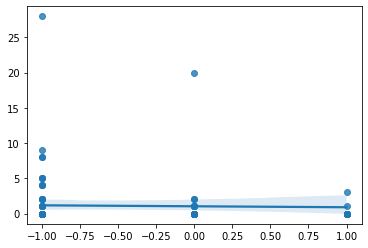

In [152]:
sns.regplot(SentimentList,list(A))

In [153]:
!pip install botometer requests tweepy


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import botometer

In [ ]:
#rapidapi_key = "aAgwGJHmmXjaoM1wzvS4ktrzy"

#twitter_app_auth = {
    #'consumer_key': 'aAgwGJHmmXjaoM1wzvS4ktrzy',
    #'consumer_secret': 'PRsuzR3iWBfOamJxBLJFDQY6ainBpwJjBw9P12oNsapDP5Tg66',
    #'access_token': '722427174-e6r2U1VcfVOyDN8Wgtx07wvcnKwbBIp6YJ9XYNdQ',
    #'access_token_secret': 'uNntX8LGtIudFuEn8wfwAvrkcCsiQQss1qeND0YARGlk9',
 # }

In [166]:
bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

In [ ]:
#for account_name, result in bom.check_accounts_in(UserId):
  #print ("=======================", account_name, "=======================")
  #print (result)

In [73]:
import matplotlib.pyplot as plt

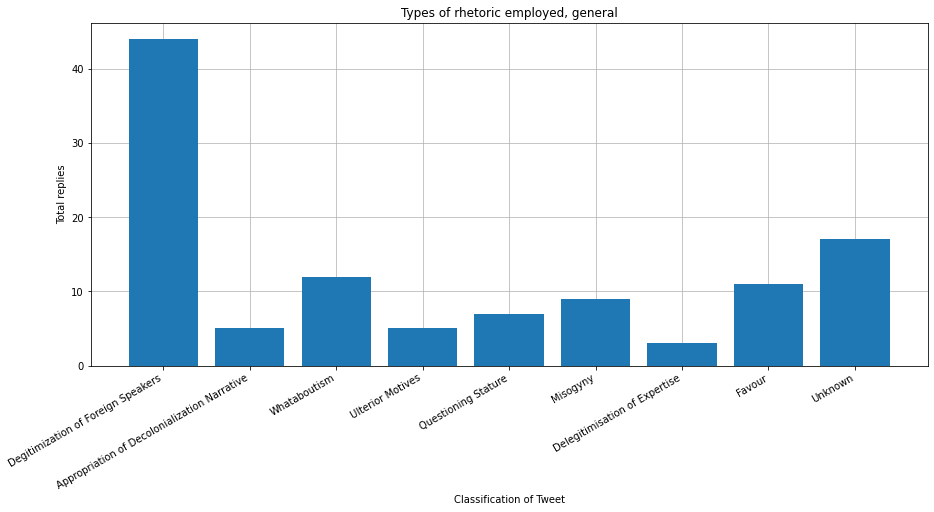

In [88]:
fig, ax = plt.subplots(figsize=(15, 7))
LabelsGeneral = X=['Degitimization of Foreign Speakers','Appropriation of Decolonialization Narrative','Whataboutism',
          'Ulterior Motives','Questioning Stature','Misogyny','Delegitimisation of Expertise','Favour','Unknown']
ax.bar(LabelsGeneral,FinalList)
ax.set_xlabel('Classification of Tweet')
ax.set_ylabel('Total replies')
ax.set_title('Types of rhetoric employed, general')
fig.autofmt_xdate()
plt.grid(animated=True,alpha=0.9)
ax.set_axisbelow(True)
plt.show()
fig.savefig('GENERAL RHETORIC.jpg', bbox_inches='tight', dpi=600)
#feel free to play around with visuals

In [ ]:
#ideas from here:
#scrape botometer scores, add as new columns
#get general average,
#average over a certain language, perhaps nlikes, etc (perhaps botometer score correlates with how many replies it got or something)
#perhaps possible to find a botometer score given what type of rhetoric was employed?
#other fun data stuff I suppose